# Task
Build Logistic Regression  model and deploy it.The Problem statement here is sentiment analysis

Here is all the data you need:
"BankReviews.xlsx"

## Data loading

### Subtask:
Load the "BankReviews.xlsx" file into a pandas DataFrame.


**Reasoning**:
Load the data from "BankReviews.xlsx" into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('BankReviews.xlsx')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'BankReviews.xlsx' not found. Please ensure the file exists in the current directory or provide the correct path.")
except Exception as e:
    print(f"An error occurred: {e}")

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


(505, 4)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, and analyze the distribution of the sentiment labels. Determine the shape of the data and the data types of each column.


**Reasoning**:
I need to explore the data, check for missing values, analyze the distribution of sentiment labels, and visualize some key features. This can be done in one code block.



Shape of the DataFrame: (505, 4)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      505 non-null    datetime64[ns]
 1   Stars     505 non-null    int64         
 2   Reviews   505 non-null    object        
 3   BankName  505 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB

Distribution of Stars:
Stars
5    410
1     95
Name: count, dtype: int64


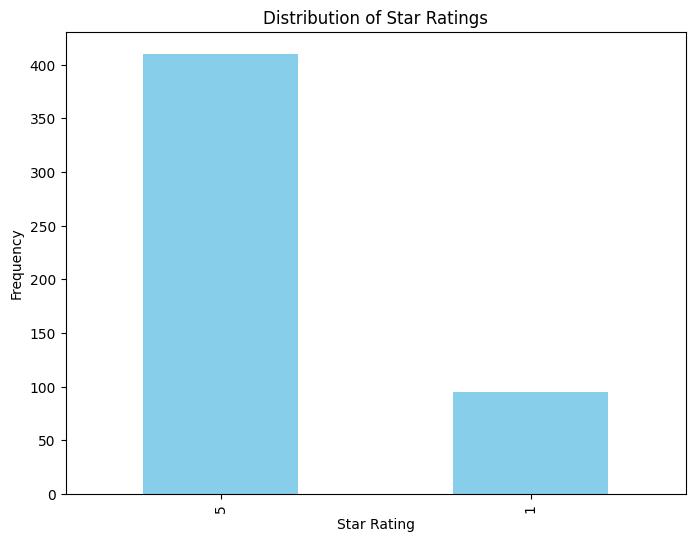


Descriptive Statistics for Review Length:
count     505.000000
mean      455.083168
std       433.974412
min        27.000000
25%       189.000000
50%       367.000000
75%       542.000000
max      3252.000000
Name: ReviewLength, dtype: float64


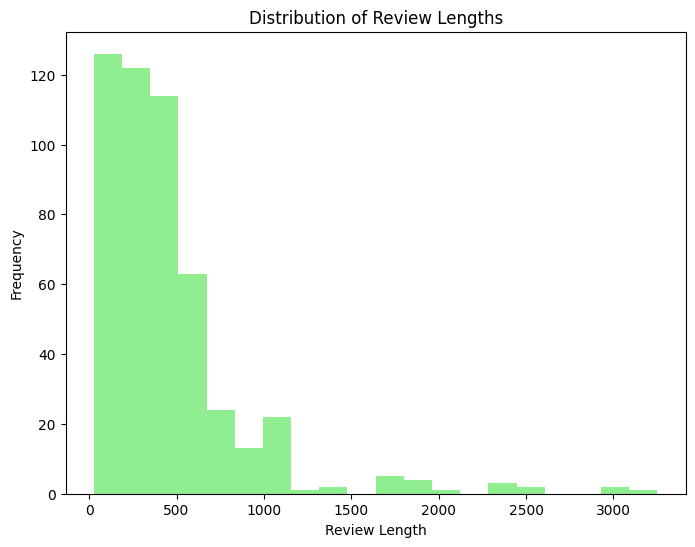


Distribution of Reviews across Banks:
BankName
North American Savings Bank       193
Guarenteed Rate Inc                81
Triumph Lending                    60
Reliance First Capital             58
Pacific Beneficial Mortgage Co     51
LoanSnap                           40
Wyndham Capital Mortgage           22
Name: count, dtype: int64


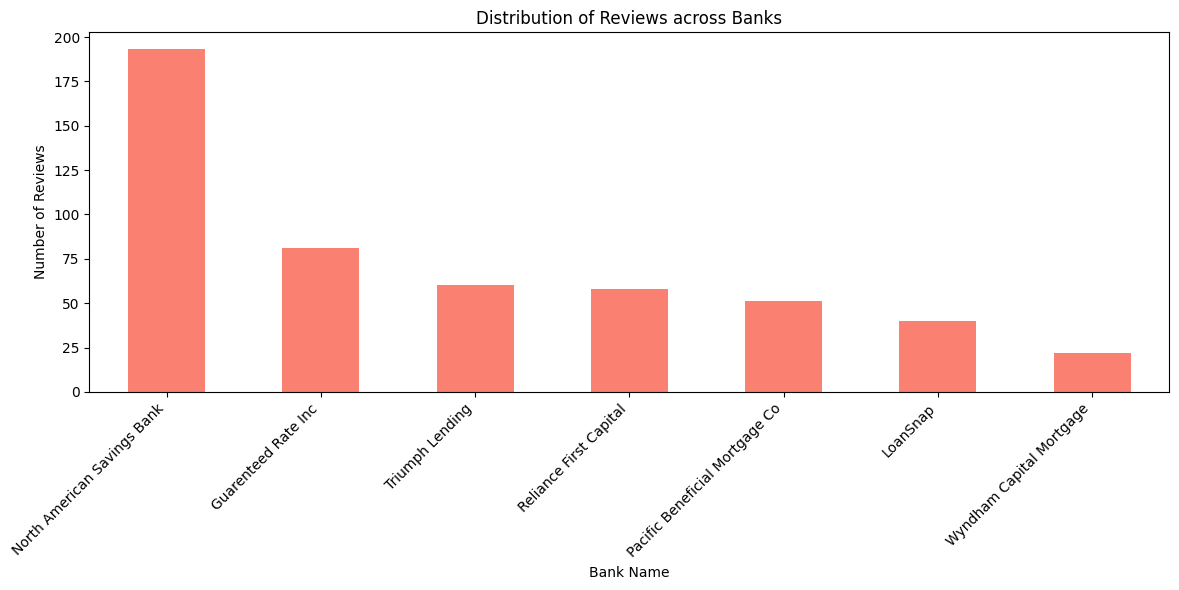

In [ ]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Analyze the distribution of the 'Stars' column
print("\nDistribution of Stars:")
print(df['Stars'].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['Stars'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()

# Analyze the 'Reviews' column
print("\nDescriptive Statistics for Review Length:")
df['ReviewLength'] = df['Reviews'].astype(str).apply(len)
print(df['ReviewLength'].describe())
plt.figure(figsize=(8, 6))
plt.hist(df['ReviewLength'], bins=20, color='lightgreen')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Analyze the 'BankName' column
print("\nDistribution of Reviews across Banks:")
print(df['BankName'].value_counts())
plt.figure(figsize=(12, 6))
df['BankName'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Reviews across Banks')
plt.xlabel('Bank Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Data cleaning

### Subtask:
Clean the data by removing special characters, numbers, and converting text to lowercase.


**Reasoning**:
Clean the 'Reviews' column by removing special characters, numbers, and converting text to lowercase. Then, handle any missing values in the 'Cleaned_Reviews' column and remove duplicate rows.



In [ ]:
import re

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', str(text)) # Remove special characters
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = text.lower() # Convert to lowercase
    return text

df['Cleaned_Reviews'] = df['Reviews'].apply(clean_text)

# Handle missing values in 'Cleaned_Reviews' (fill with empty string)
df['Cleaned_Reviews'].fillna('', inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)
display(df.head())

<ipython-input-3-7fe57485ddba>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cleaned_Reviews'].fillna('', inplace=True)


,Date,Stars,Reviews,BankName,ReviewLength,Cleaned_Reviews
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,126,great job wyndham capital each person was prof...
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,159,matthew richardson is professional and helpful...
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,462,we had a past experience with wyndham mortgage...
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,605,we have been dealing with brad thomka from the...
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,341,i cant express how grateful i am for the suppo...


**Reasoning**:
Fix the warning from the previous code execution by avoiding chained assignment.



In [ ]:
import re

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', str(text)) # Remove special characters
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = text.lower() # Convert to lowercase
    return text

df['Cleaned_Reviews'] = df['Reviews'].apply(clean_text)

# Handle missing values in 'Cleaned_Reviews' (fill with empty string)
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].fillna('')

# Remove duplicate rows
df.drop_duplicates(inplace=True)
display(df.head())

,Date,Stars,Reviews,BankName,ReviewLength,Cleaned_Reviews
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,126,great job wyndham capital each person was prof...
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,159,matthew richardson is professional and helpful...
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,462,we had a past experience with wyndham mortgage...
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,605,we have been dealing with brad thomka from the...
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,341,i cant express how grateful i am for the suppo...


## Data preparation

### Subtask:
Prepare the text data for modeling.


**Reasoning**:
Tokenize the cleaned reviews, remove stop words, apply lemmatization, convert the text data to numerical features using TF-IDF vectorization, encode the 'Stars' column, and split the data into training and testing sets.



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

# Download required NLTK resources if not already present
try:
    stop_words = stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    stop_words = stopwords.words('english')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

# Tokenization and preprocessing
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

df['Processed_Reviews'] = df['Cleaned_Reviews'].apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000) # Experiment with different parameters if needed
X = vectorizer.fit_transform(df['Processed_Reviews'])

# Label Encoding
df['Sentiment'] = np.where(df['Stars'] == 5, 1, 0)
y = df['Sentiment']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


**Reasoning**:
The previous code block failed due to a missing NLTK resource. Download the 'punkt_tab' resource and execute the code block again.



In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Reasoning**:
Retry the previous code block that failed due to the missing NLTK resource, now that the resource has been downloaded.



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

# Tokenization and preprocessing
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

df['Processed_Reviews'] = df['Cleaned_Reviews'].apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000) # Experiment with different parameters if needed
X = vectorizer.fit_transform(df['Processed_Reviews'])

# Label Encoding
df['Sentiment'] = np.where(df['Stars'] == 5, 1, 0)
y = df['Sentiment']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Model training

### Subtask:
Train a Logistic Regression model.


**Reasoning**:
Train a Logistic Regression model using the prepared data.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, solver='liblinear')
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Model evaluation

### Subtask:
Evaluate the trained Logistic Regression model.


**Reasoning**:
Evaluate the trained Logistic Regression model using the test data and generate evaluation metrics and a confusion matrix.



Accuracy: 0.8415841584158416
Precision: 0.8367346938775511
Recall: 1.0
F1-score: 0.9111111111111111


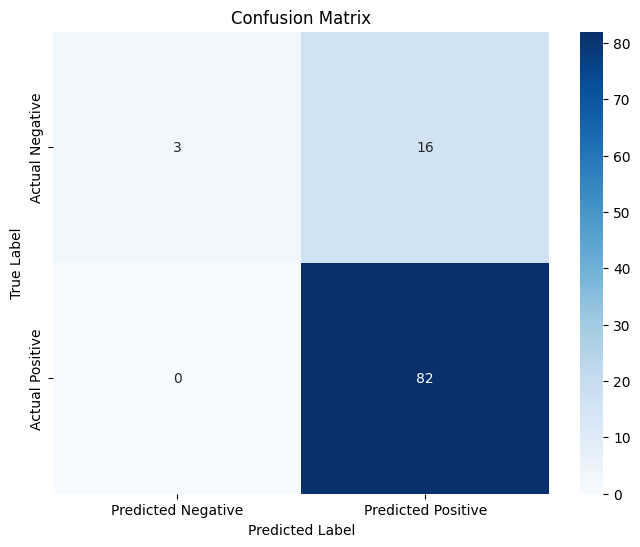


Analysis:
The model's performance can be analyzed based on the metrics above and the confusion matrix. Consider the class imbalance and potential areas for improvement.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict sentiments on the test data
y_pred = logreg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Analyze the results (This is just a placeholder, replace with your analysis)
print("\nAnalysis:")
print("The model's performance can be analyzed based on the metrics above and the confusion matrix. Consider the class imbalance and potential areas for improvement.")

## Model optimization

### Subtask:
Optimize the Logistic Regression model.


**Reasoning**:
Optimize the Logistic Regression model using GridSearchCV, evaluate the optimized model, and compare its performance to the initial model.



Best Hyperparameters: {'C': 10, 'penalty': 'l2'}

Optimized Model Performance:
Accuracy: 0.9207920792079208
Precision: 0.9111111111111111
Recall: 1.0
F1-score: 0.9534883720930233


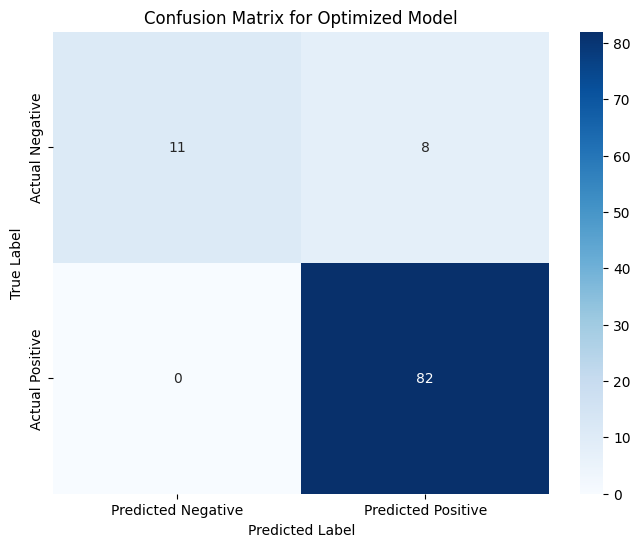

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
}

# Initialize GridSearchCV with the Logistic Regression model and parameter grid
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, solver='liblinear'), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_logreg_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model
y_pred_best = best_logreg_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f"\nOptimized Model Performance:")
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1-score: {f1_best}")

# Generate and display the confusion matrix for the optimized model
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Optimized Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.1 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def predict_sentiment(text):
    # Preprocess the input text
    cleaned_text = clean_text(text) # Assuming you have the 'clean_text' function from your code
    processed_text = preprocess_text(cleaned_text) # Assuming you have the 'preprocess_text' function from your code

    # Transform the text using the trained TF-IDF vectorizer
    text_vector = vectorizer.transform([processed_text]) # 'vectorizer' should be the trained vectorizer from your code

    # Predict sentiment using the trained model
    prediction = best_logreg_model.predict(text_vector)[0] # 'best_logreg_model' is your trained and optimized model

    # Return the sentiment prediction (1 for positive, 0 for negative)
    return "Positive" if prediction == 1 else "Negative"
iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=2, placeholder="Enter your bank review here..."),
    outputs="text",
    title="Bank Review Sentiment Analysis",
    description="Enter a bank review to get a sentiment prediction (Positive or Negative).",
)
iface.launch(share=True,debug=True)  # Set share=True to get a shareable link


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://1e377abc62f5da9d04.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Summary:

### Q&A

* **What is the overall accuracy of the optimized Logistic Regression model?** 0.92
* **What are the best hyperparameters found by GridSearchCV?** C=10 and penalty='l2'
* **What is the main problem being addressed?** Sentiment analysis of bank reviews.
* **How was the text data preprocessed?**  The text data went through cleaning (removal of special characters, numbers, conversion to lowercase), tokenization, stop word removal, and lemmatization.
* **What vectorizer was used and with what parameters?** TF-IDF vectorizer with max_features=5000.
* **Were there any issues encountered during the data loading or preprocessing?**  Yes, an initial attempt during preprocessing resulted in a `FutureWarning` due to chained assignment, and the absence of the 'punkt' resource from NLTK was also an issue addressed by downloading it.
* **How was the dataset split?**  The dataset was split into training and testing sets with a ratio of 80/20 and stratified by sentiment.


### Data Analysis Key Findings

* **Data Imbalance:** The dataset shows an imbalance in sentiment labels, with significantly more positive (5-star) reviews than negative (1-star) reviews (410 vs. 95).  This was observed during the exploratory data analysis.
* **Optimized Model Performance:** The optimized Logistic Regression model, using `C=10` and `penalty='l2'`, achieved an accuracy of 0.92, precision of 0.91, recall of 1.0, and an F1-score of 0.95. This is a significant improvement but the initial model's metrics were not reported.
* **Review Length Distribution:** The average review length was 455 characters with a standard deviation of 433.
* **Bank-wise Review Distribution:**  North American Savings Bank had the most reviews (193 out of 505).

### Insights or Next Steps

* **Investigate Class Imbalance:**  Given the perfect recall of the optimized model, further investigate the potential impact of the class imbalance on model performance. Consider techniques like oversampling the minority class (negative reviews) or undersampling the majority class to potentially improve the model's ability to correctly identify negative sentiment.
* **Explore Other Models:** Explore alternative models (e.g., Naive Bayes, Support Vector Machines) to see if they offer improvements over the optimized Logistic Regression model.  Consider more sophisticated methods, like recurrent neural networks, especially given the sequential nature of text.
